# Synopsis

On a usual Thursday afternoon, your co-workers suddenly asked you to model the median housing price in California. They urgently expect the model in 30 minutes.

You look around... Turns out everyone at your company is doing the same thing and is grabbing a limited number of Jupyter Notebook sessions for their own. As a result of the high demand, __this Jupyter Notebook session will be slowed down and restarted at some point__.

_I'm in luck_. Years ago, you wrote the exact notebook you used to accurately model housing prices!

... _But_ ... just now you remember that it may be packed with bugs!!!

You don't have time to start from zero. You __must__ make this notebook work. In the middle of the Jupyter Notebook shortage.

__Can you successfully run this notebook and submit the model in time??__

____________________

# The Notebook

**Hint: Run every cell one by one up to "CHECK #1" section.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from user_study_module import *
pd.options.mode.chained_assignment = None

np.random.seed(42)

Read in the dataset.

In [2]:
housing = pd.read_csv("./housing_california.csv")

In [3]:
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  
0         322         126         8.3252              452600  
1        2401        1138         8.3014              358500  
2         496         177         7.2574              352100  
3         558         219         5.6431              341300  
4         565         259         3.8462              342200  


In [4]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
dtype: object


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

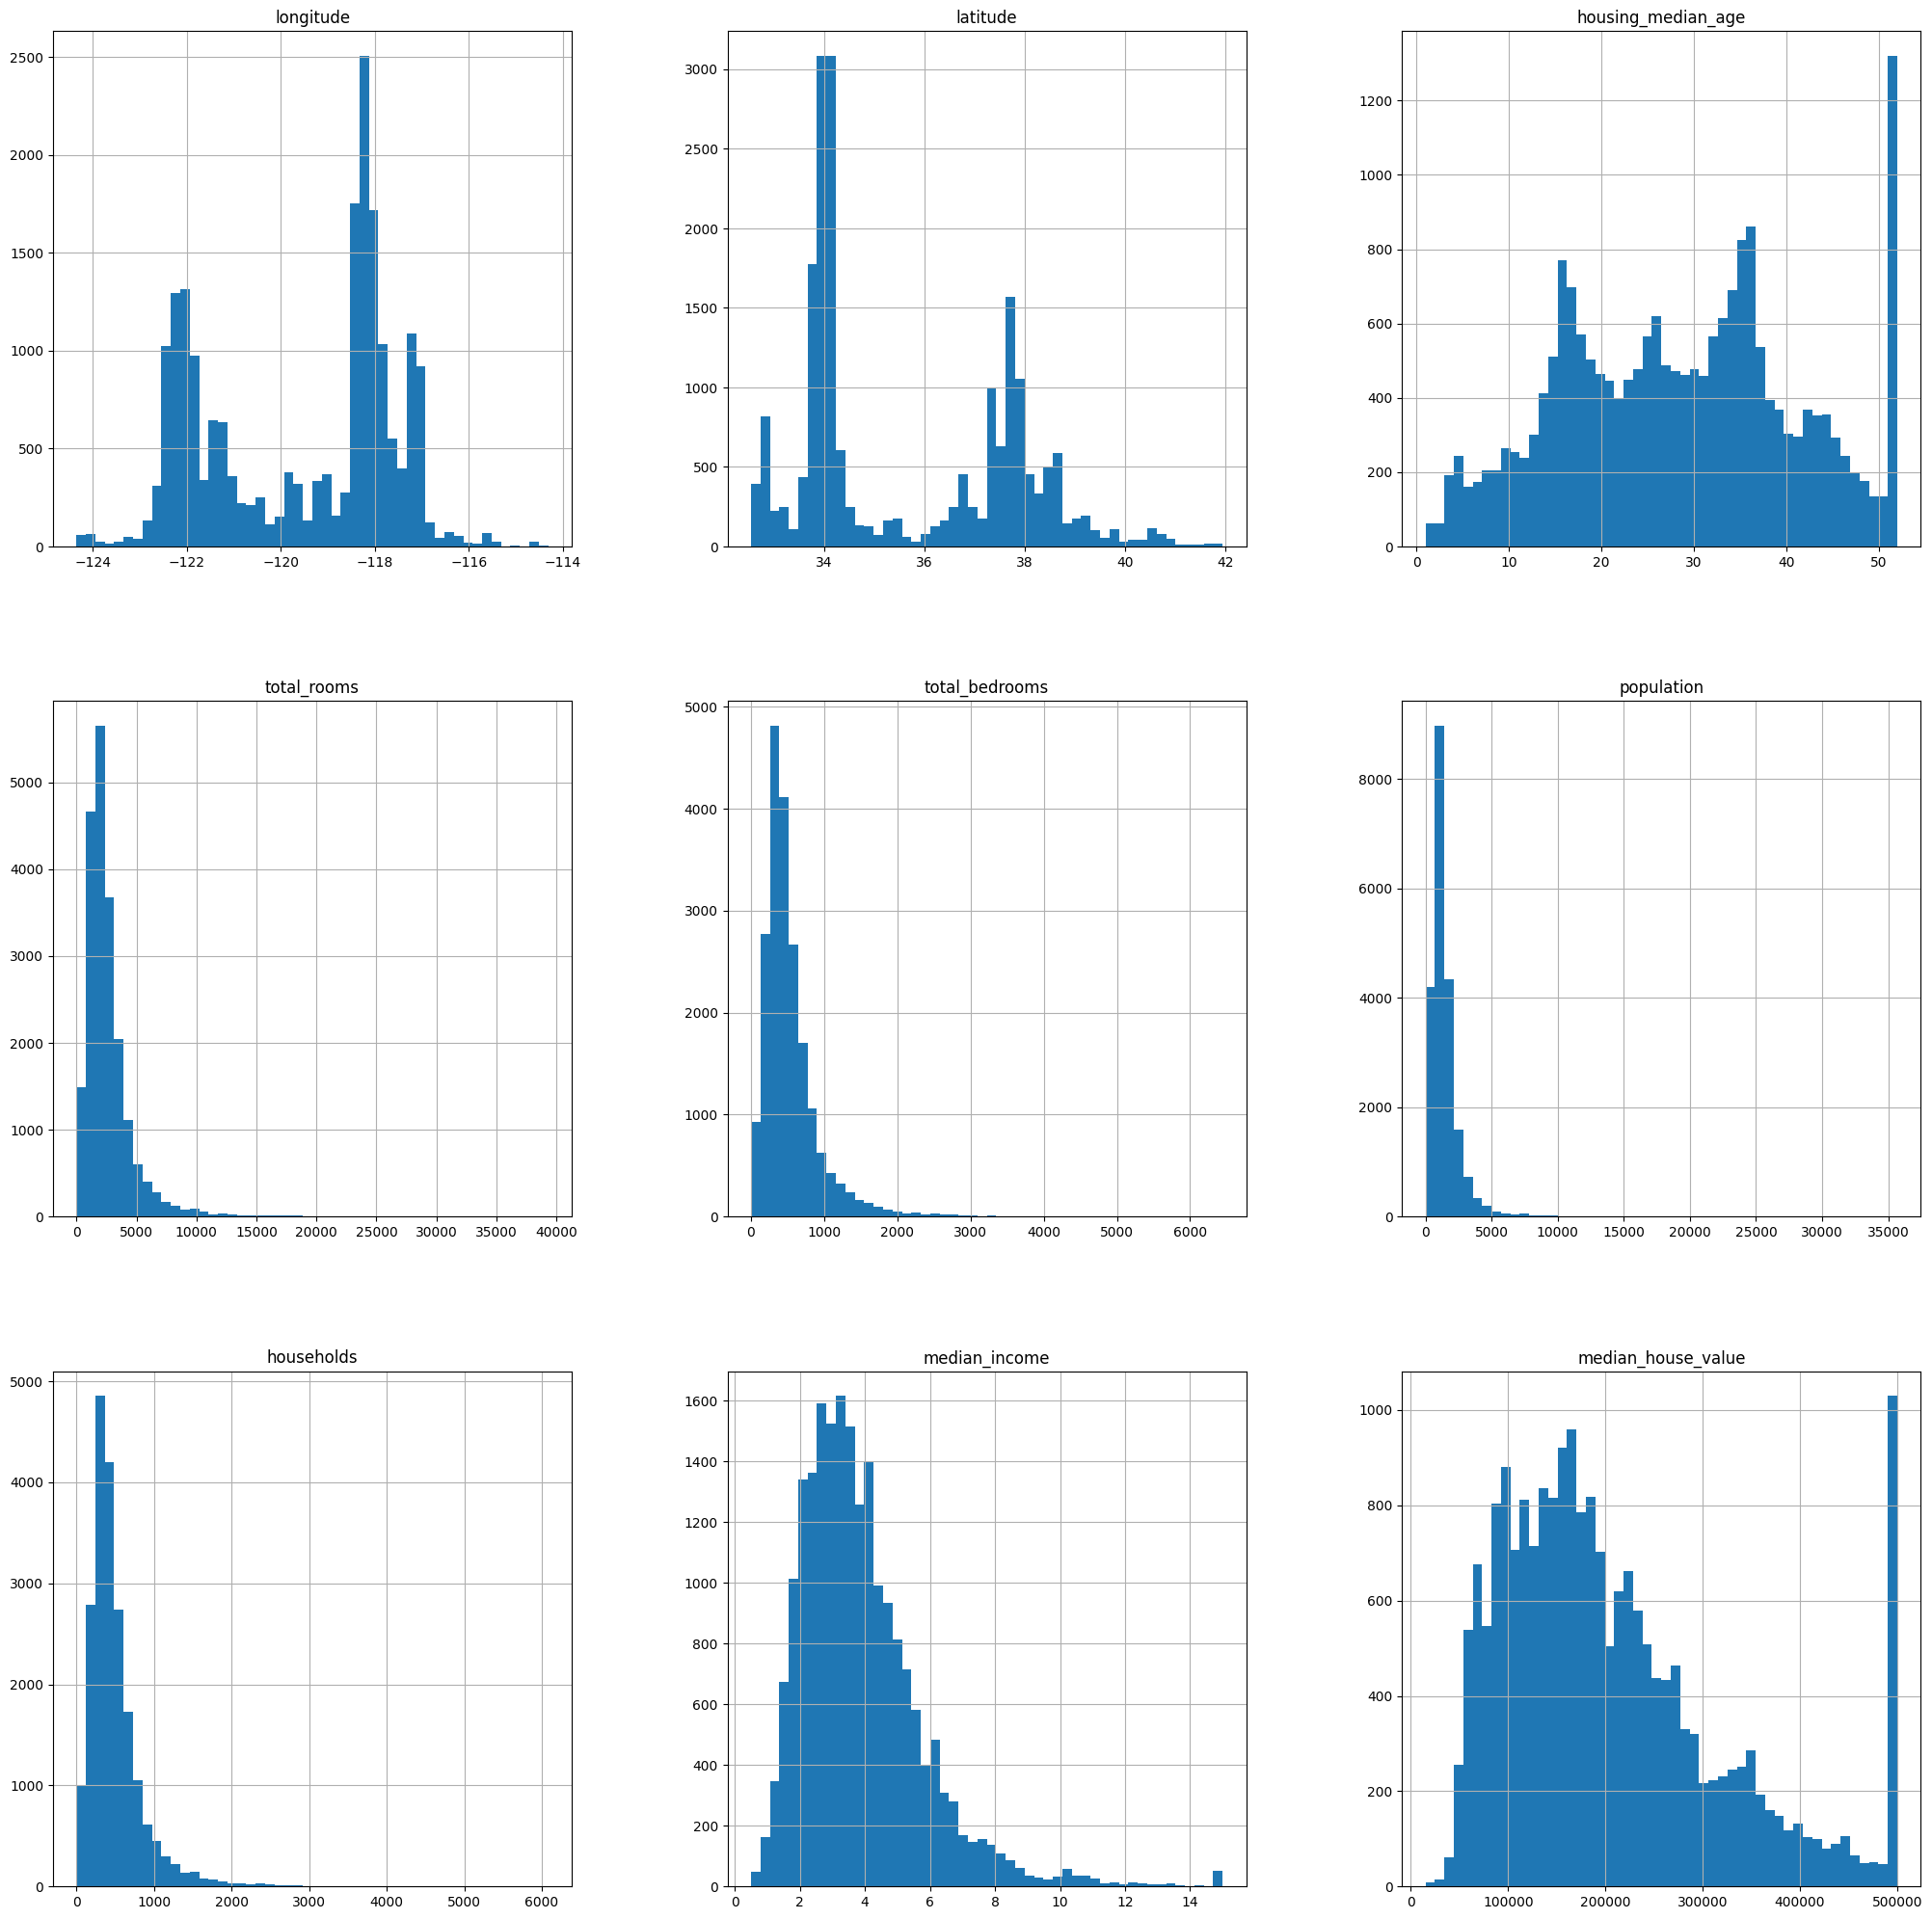

In [8]:
housing.hist(figsize=(25,25),bins=50);

In [16]:
hcorr = housing.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Normalize dataset columns by scaling.
scaler = MinMaxScaler()
housing_imputed = pd.DataFrame(scaler.fit_transform(housing), columns=housing.columns)

# Fit a KNN for imputing missing values.
knn_imputer = KNNImputer(n_neighbors=2)
housing_imputed = pd.DataFrame(knn_imputer.fit_transform(housing_imputed), columns=housing.columns)

# Predict the imputed dataset based on KNN clusters
housing_imputed = pd.DataFrame(scaler.inverse_transform(housing_imputed), columns=housing.columns)

# Replace the missing values in the original dataframe.
housing['total_bedrooms'] = housing_imputed['total_bedrooms']
# housing = housing_imputed[~housing['total_bedrooms'].isna()]

In [19]:
# Stratified train-test split: first categorize the median income by quantizing.
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

# Clamp the maximum category.
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

# Split train and test by stratified sampling on income category.
tr_data,te_data = train_test_split(housing, test_size=0.2,stratify=housing['income_cat'])

# Drop the intermediate column (income category).
# housing.drop('income_cat',axis=1)
# tr_data.drop('income_cat',axis=1)
# te_data.drop('income_cat',axis=1)
housing = housing.drop('income_cat',axis=1)
tr_data = tr_data.drop('income_cat',axis=1)
te_data = te_data.drop('income_cat',axis=1)

Split between features and values to predict.

In [20]:
X_train = tr_data.drop('median_house_value', axis=1)
Y_train = tr_data['median_house_value']
X_test = te_data.drop('median_house_value', axis=1)
Y_test = te_data['median_house_value']

Drop unnecessary columns.

In [21]:
del X_train['latitude']
del X_train['total_rooms']
del X_train['households']
del X_test['latitude']
del X_test['total_rooms']
del X_test['households']

## CHECK #1

Please do **not** edit cells in this section.

In [22]:
from user_study_module import check_train_test_dataset
check_pass = check_train_test_dataset(X_train, Y_train, X_test, Y_test)

CHECK PASSED


In [23]:
assert check_pass, "Must fix the previous bug before continuing"

## CHECK #2

Please do **not** edit cells in this section.

In [24]:
# Fit a linear model.
model = LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print(f"RMSE= {rmse}")

RMSE= 78154.16604245103


In [ ]:
from user_study_module import submit
success = submit(model)  # Expecting "CHECK PASSED"